<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Sea levels in the Netherlands and beyond<br>
### The ocean oscillation - examples of effects in the North Sea
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [1]:
# General packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
import datetime as dt

# project specific package
#import sea_level_tools as sea

#### Connect database and import data

In [2]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'RWS_processed.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [3]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,const_yr,const_yr,2,"CREATE TABLE ""const_yr"" (\n""tijd"" TIMESTAMP,\n..."
1,table,timeseries,timeseries,3,"CREATE TABLE ""timeseries"" (\n""index"" INTEGER,\..."
2,table,const_mnth,const_mnth,4,"CREATE TABLE ""const_mnth"" (\n""tijd"" TIMESTAMP,..."
3,index,ix_const_yr_tijd_naam_level_2,const_yr,5,"CREATE INDEX ""ix_const_yr_tijd_naam_level_2""ON..."
4,index,ix_timeseries_index,timeseries,6,"CREATE INDEX ""ix_timeseries_index""ON ""timeseri..."
5,index,ix_const_mnth_tijd_naam_level_2,const_mnth,7,"CREATE INDEX ""ix_const_mnth_tijd_naam_level_2""..."


In [4]:
sql = "PRAGMA table_info(timeseries)"
cnxn.execute(sql).fetchall()

[(0, 'index', 'INTEGER', 0, None, 0),
 (1, 'naam', 'TEXT', 0, None, 0),
 (2, 'tijd', 'TIMESTAMP', 0, None, 0),
 (3, 'waarde', 'REAL', 0, None, 0),
 (4, 'h_astr', 'REAL', 0, None, 0),
 (5, 'setup', 'REAL', 0, None, 0)]

In [5]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT tijd, waarde AS h, h_astr as hastr, setup AS s FROM timeseries WHERE "
    "naam IN ('Vlissingen')"
)
df = pd.read_sql(sql, cnxn)

#### Inspect data

In [6]:
df.head()

,tijd,h,hastr,s
0,1877-01-01 14:30:00,2.81,0.130782,2.679218
1,1877-01-02 10:40:00,-2.72,-0.044178,-2.675822
2,1877-01-02 16:10:00,2.31,0.162365,2.147635
3,1877-01-03 09:25:00,-2.01,-0.121415,-1.888585
4,1877-01-03 15:10:00,2.46,0.091243,2.368757


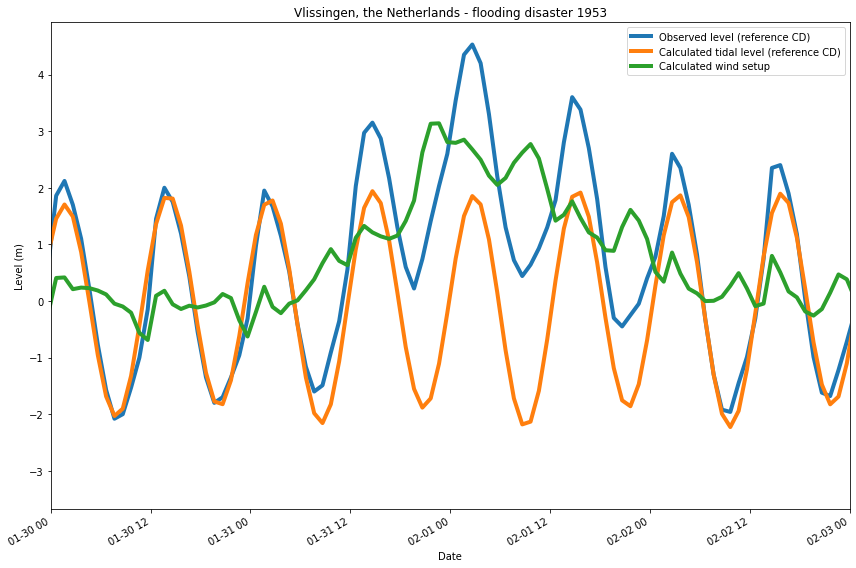

In [13]:
df.plot(
    x = 'tijd', y = ['h', 'hastr', 's'], 
    lw = 4, figsize = (12, 8),
    xlim = (dt.datetime(1953, 1, 30), dt.datetime(1953, 2, 3)),
    subplots = False, sharex = True)
plt.xlabel('Date')
plt.legend(
    ['Observed level (reference CD)', 'Calculated tidal level (reference CD)', 'Calculated wind setup'],
    loc = 'best')
plt.ylabel('Level (m)')
plt.title('Vlissingen, the Netherlands - flooding disaster 1953')
plt.tight_layout()
plt.savefig('../pics/Vlissingen_1953.jpg');

#### End script
Prepared by HVEC lab, 2022